In [1]:
# f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30
# 1.Определить корни
# 2.Найти интервалы, на которых функция возрастает
# 3.Найти интервалы, на которых функция убывает
# 4.Построить график
# 5.Вычислить вершину
# 6.Определить промежутки, на котором f > 0
# 7.Определить промежутки, на котором f < 0

from sympy import *

x = Symbol('x')
expr = -12*x**4*sin(cos(x))-18*x**3+5*x**2+10*x-30
expr

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

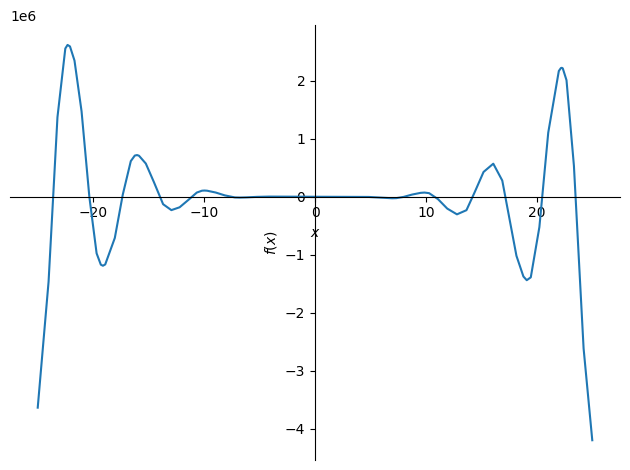

In [70]:
# Построим график функции в интервале значений x от -5,5 до 5,0
from sympy.plotting import plot
begin, end = -25.0, 25.0 # интервал исследования функции

p1 = plot(expr, (x, begin, end))

In [71]:
# Определим корни функции в интервале значений x от -5,5 до 5,0
from scipy import optimize

def f(x):
    return -12*x**4*sin(cos(x))-18*x**3+5*x**2+10*x-30

def f_roots(func):
    d = 0.01
    fr = []
    for i in range(int(begin/d),int(end/d)+1):
        a,b = i*d, i*d+d
        try:
            root = optimize.brentq(f, a, b)
        except:
            continue
        else:
            fr.append(root)
    return fr
print('Корни:')
for i in f_roots(f):
    print(i)

Корни:
-23.62619729643611
-20.345594135942548
-17.366552506907745
-14.02805599166234
-11.133769061035819
-7.650622285132755
-5.026865928206212
-1.3389666392771093
2.273056845756222
4.3835236979688865
8.035164133413524
10.860649989594162
14.240584810251637
17.19284807004507
20.492600063216873
23.498838876455114


In [72]:
# Определим промежутки, на которых f(x) > 0 и f(x) < 0
def check_pos_neg(a,b):
    x = (a + b) / 2
    y = f(x)
    if y>0:
        print(f'На промежутке от {a} до {b}: f(x) > 0')
    else:
        print(f'На промежутке от {a} до {b}: f(x) < 0')

r=f_roots(f)
r.insert(0, begin)
r.append(end)
for i in range(len(r)-1):
    check_pos_neg(round(r[i],3), round(r[i+1],3))    


На промежутке от -25.0 до -23.626: f(x) < 0
На промежутке от -23.626 до -20.346: f(x) > 0
На промежутке от -20.346 до -17.367: f(x) < 0
На промежутке от -17.367 до -14.028: f(x) > 0
На промежутке от -14.028 до -11.134: f(x) < 0
На промежутке от -11.134 до -7.651: f(x) > 0
На промежутке от -7.651 до -5.027: f(x) < 0
На промежутке от -5.027 до -1.339: f(x) > 0
На промежутке от -1.339 до 2.273: f(x) < 0
На промежутке от 2.273 до 4.384: f(x) > 0
На промежутке от 4.384 до 8.035: f(x) < 0
На промежутке от 8.035 до 10.861: f(x) > 0
На промежутке от 10.861 до 14.241: f(x) < 0
На промежутке от 14.241 до 17.193: f(x) > 0
На промежутке от 17.193 до 20.493: f(x) < 0
На промежутке от 20.493 до 23.499: f(x) > 0
На промежутке от 23.499 до 25.0: f(x) < 0


In [73]:
# Вычислим вершины функции в интервале значений x от -5,5 до 5,0
d = 0.001
up_down = []
points_x = [x*d for x in range(int(begin/d),int(end/d+1))]
points_y = list(map(lambda x: f(x), points_x))
for i in range(0,len(points_y)-1):
    dy = points_y[i+1] - points_y[i]
    if dy > 0:
        up_down.append(1)
    elif dy < 0:
        up_down.append(-1)
    else:
        up_down.append(0)
tops = []
for i in range(0,len(up_down)-1):
    if up_down[i] != up_down[i+1]:
        top = (points_x[i] + points_x[i+1])/2
        tops.append(top)
print('Вершины:')
for i in tops:
    print(round(i,2))

Вершины:
-22.27
-19.13
-16.08
-12.94
-9.98
-6.83
-4.17
-0.39
0.45
1.7
3.82
7.0
9.88
13.01
16.03
19.17
22.24


In [74]:
# Найдем интервалы, на которых функция возрастает и на которых функция убывает
def check_up_down(a,b):
    dy = f(b) - f(a)
    if dy > 0:
        print(f'На интервале от {a} до {b} функция возрастает')
    else:
        print(f'На интервале от {a} до {b} функция убывает')
t = list(map(lambda x : round(x, 2), tops))
t.insert(0, begin)
t.append(end)
for i in range(len(t)-1):
    check_up_down(t[i],t[i+1])


На интервале от -25.0 до -22.27 функция возрастает
На интервале от -22.27 до -19.13 функция убывает
На интервале от -19.13 до -16.08 функция возрастает
На интервале от -16.08 до -12.94 функция убывает
На интервале от -12.94 до -9.98 функция возрастает
На интервале от -9.98 до -6.83 функция убывает
На интервале от -6.83 до -4.17 функция возрастает
На интервале от -4.17 до -0.39 функция убывает
На интервале от -0.39 до 0.45 функция возрастает
На интервале от 0.45 до 1.7 функция убывает
На интервале от 1.7 до 3.82 функция возрастает
На интервале от 3.82 до 7.0 функция убывает
На интервале от 7.0 до 9.88 функция возрастает
На интервале от 9.88 до 13.01 функция убывает
На интервале от 13.01 до 16.03 функция возрастает
На интервале от 16.03 до 19.17 функция убывает
На интервале от 19.17 до 22.24 функция возрастает
На интервале от 22.24 до 25.0 функция убывает
